In [1]:
import os, inspect, sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

CURRENT_DIR = os.path.dirname(inspect.getabsfile(inspect.currentframe()))
ROOT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.insert(0, ROOT_DIR)


In [2]:
ffname = os.path.join(ROOT_DIR, "reb", "data", "ext", "Data_File_Monthly.csv")
df = pd.read_csv(ffname, parse_dates=["DATE"])
df.DATE = pd.to_datetime(df.DATE, format="%Y-%m")
df = df.loc[60:, :]
df.head()

,DATE,PAYEMS,CEU0500000003,USPRIV,AWHNONAG,CES9091000001,USGOVT,UNEMPLOY,LNS13023622,LNS13023706,...,MORTGAGE30US,MORTGAGE15US,DGS1,DGS2,DGS5,DGS10,Crude_Oil_Price,INDPRO,CMRMTSPL,W875RX1
60,1992-01-01,108374,NaN,89686,34.1,3137,18688,9283,54.0,11.9,...,8.4,8.0,NaN,NaN,NaN,7.0,NaN,63.3372,757479.217,6840.9
61,1992-02-01,108317,NaN,89628,34.1,3121,18689,9454,57.0,9.8,...,8.8,8.4,NaN,NaN,NaN,7.3,NaN,63.7864,759384.431,6879.1
62,1992-03-01,108369,NaN,89654,34.1,3121,18715,9460,57.4,9.5,...,8.9,8.6,NaN,NaN,NaN,7.5,NaN,64.3199,762440.896,6884.7
63,1992-04-01,108526,NaN,89787,34.3,3117,18739,9415,57.3,10.4,...,8.9,8.5,NaN,NaN,NaN,7.5,NaN,64.8069,767521.889,6903.6
64,1992-05-01,108653,NaN,89900,34.3,3119,18753,9744,57.7,10.3,...,8.7,8.3,NaN,NaN,NaN,7.4,NaN,65.0202,760844.122,6941.7


In [3]:
# ffname = os.path.join(ROOT_DIR, "reb", "data", "ext", "USRECM.csv")
# df_recm = pd.read_csv(ffname, parse_dates=["DATE"])
# df_recm.DATE = pd.to_datetime(df_recm.DATE, format="%Y-%m")
# df_recm.head()

Make a clen copy of data. This allows us to modify freely while we have always the original data for any further reference.

In [4]:
df_original = df.copy() 

Reindex data frame per the time stamps

In [5]:
df.set_index("DATE", inplace=True)
df.head()

,PAYEMS,CEU0500000003,USPRIV,AWHNONAG,CES9091000001,USGOVT,UNEMPLOY,LNS13023622,LNS13023706,LNS13023654,...,MORTGAGE30US,MORTGAGE15US,DGS1,DGS2,DGS5,DGS10,Crude_Oil_Price,INDPRO,CMRMTSPL,W875RX1
DATE,,,,,,,,,,,,,,,,,,,,,
1992-01-01,108374,NaN,89686,34.1,3137,18688,9283,54.0,11.9,13.1,...,8.4,8.0,NaN,NaN,NaN,7.0,NaN,63.3372,757479.217,6840.9
1992-02-01,108317,NaN,89628,34.1,3121,18689,9454,57.0,9.8,13.6,...,8.8,8.4,NaN,NaN,NaN,7.3,NaN,63.7864,759384.431,6879.1
1992-03-01,108369,NaN,89654,34.1,3121,18715,9460,57.4,9.5,13.4,...,8.9,8.6,NaN,NaN,NaN,7.5,NaN,64.3199,762440.896,6884.7
1992-04-01,108526,NaN,89787,34.3,3117,18739,9415,57.3,10.4,13.6,...,8.9,8.5,NaN,NaN,NaN,7.5,NaN,64.8069,767521.889,6903.6
1992-05-01,108653,NaN,89900,34.3,3119,18753,9744,57.7,10.3,12.8,...,8.7,8.3,NaN,NaN,NaN,7.4,NaN,65.0202,760844.122,6941.7


Check on the missing values

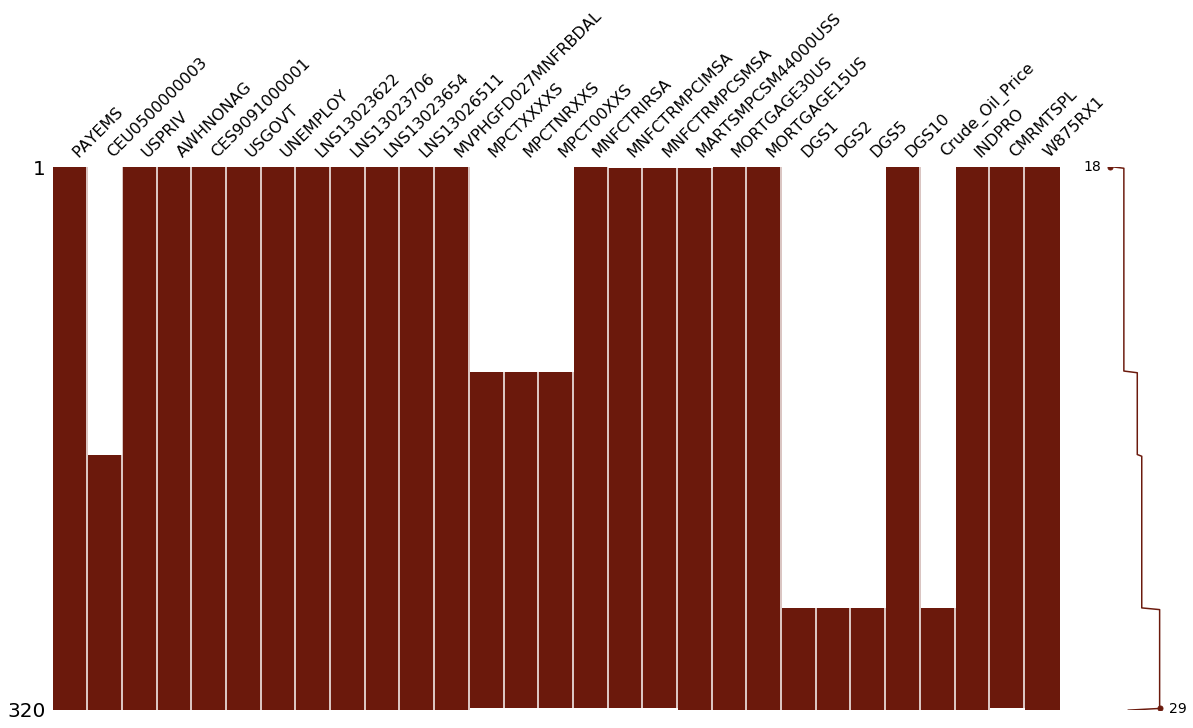

In [6]:
msno.matrix(df=df, figsize=(20, 10), color=(0.42, 0.1, 0.05))

Drop any columns with NaN values

In [7]:
# drop columns: axis=1; drop rows: axis=0
df.dropna(axis=1, inplace=True)

Index(['PAYEMS', 'USPRIV', 'AWHNONAG', 'CES9091000001', 'USGOVT', 'UNEMPLOY',
       'LNS13023622', 'LNS13023706', 'LNS13023654', 'LNS13026511',
       'MVPHGFD027MNFRBDAL', 'MORTGAGE30US', 'MORTGAGE15US', 'DGS10', 'INDPRO',
       'W875RX1'],
      dtype='object')

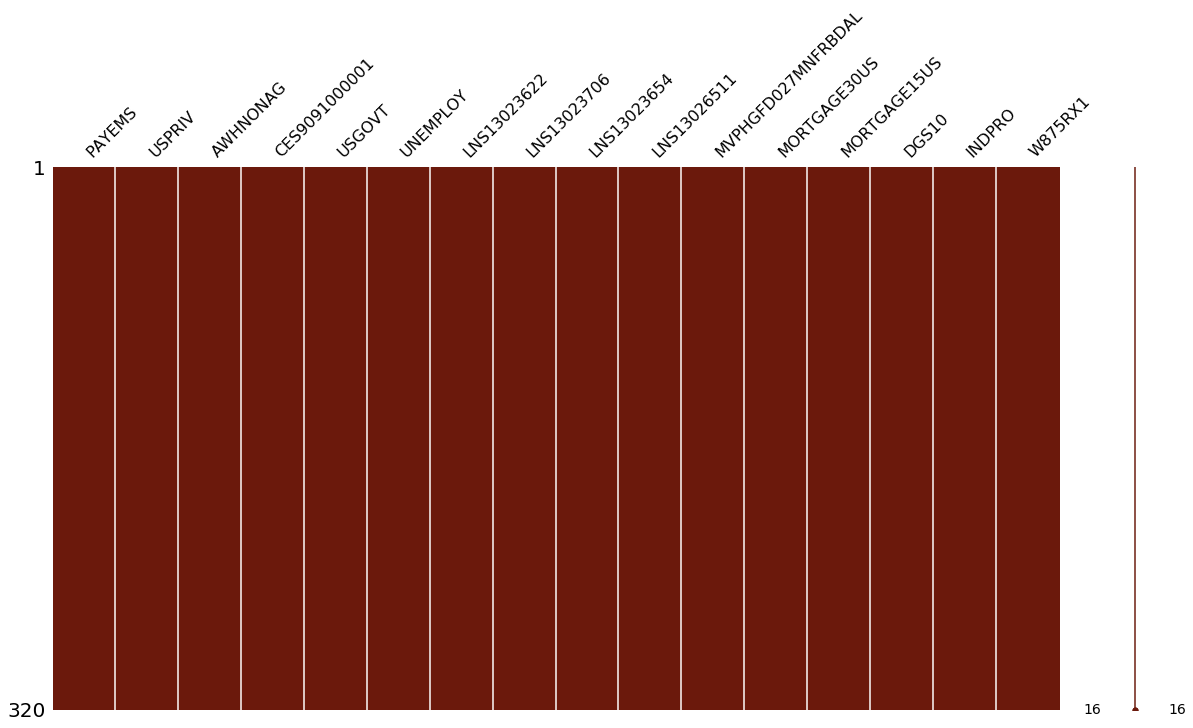

In [8]:
msno.matrix(df=df, figsize=(20, 10), color=(0.42, 0.1, 0.05))
df.columns

Check on distribution of variables

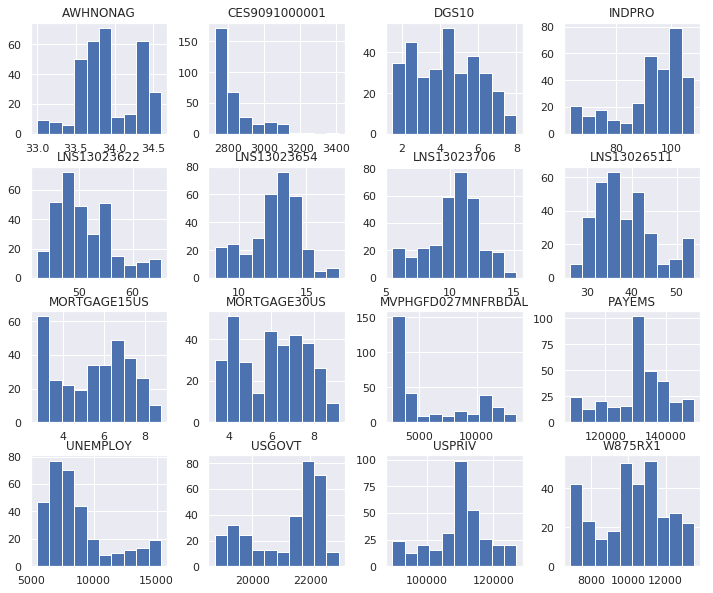

In [9]:
sns.set()
_ = df.hist(sharex=False,
            sharey=False,
            figsize=(12, 10))
plt.show()

Check on variable correlations

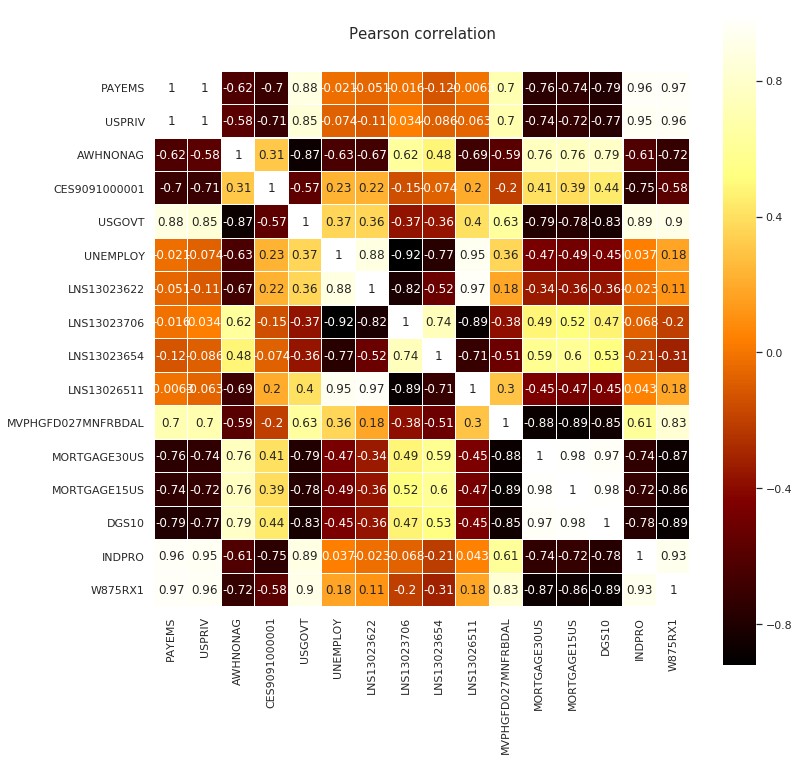

In [10]:
colormap = plt.cm.afmhot
plt.figure(figsize=(12,12))
plt.title('Pearson correlation', y=1.05, size=15)
sns.heatmap(df.corr(),
            linewidths=0.1,
            vmax=1.0,
            square=True, 
            cmap=colormap,
            linecolor='white',
            annot=True)
plt.show()

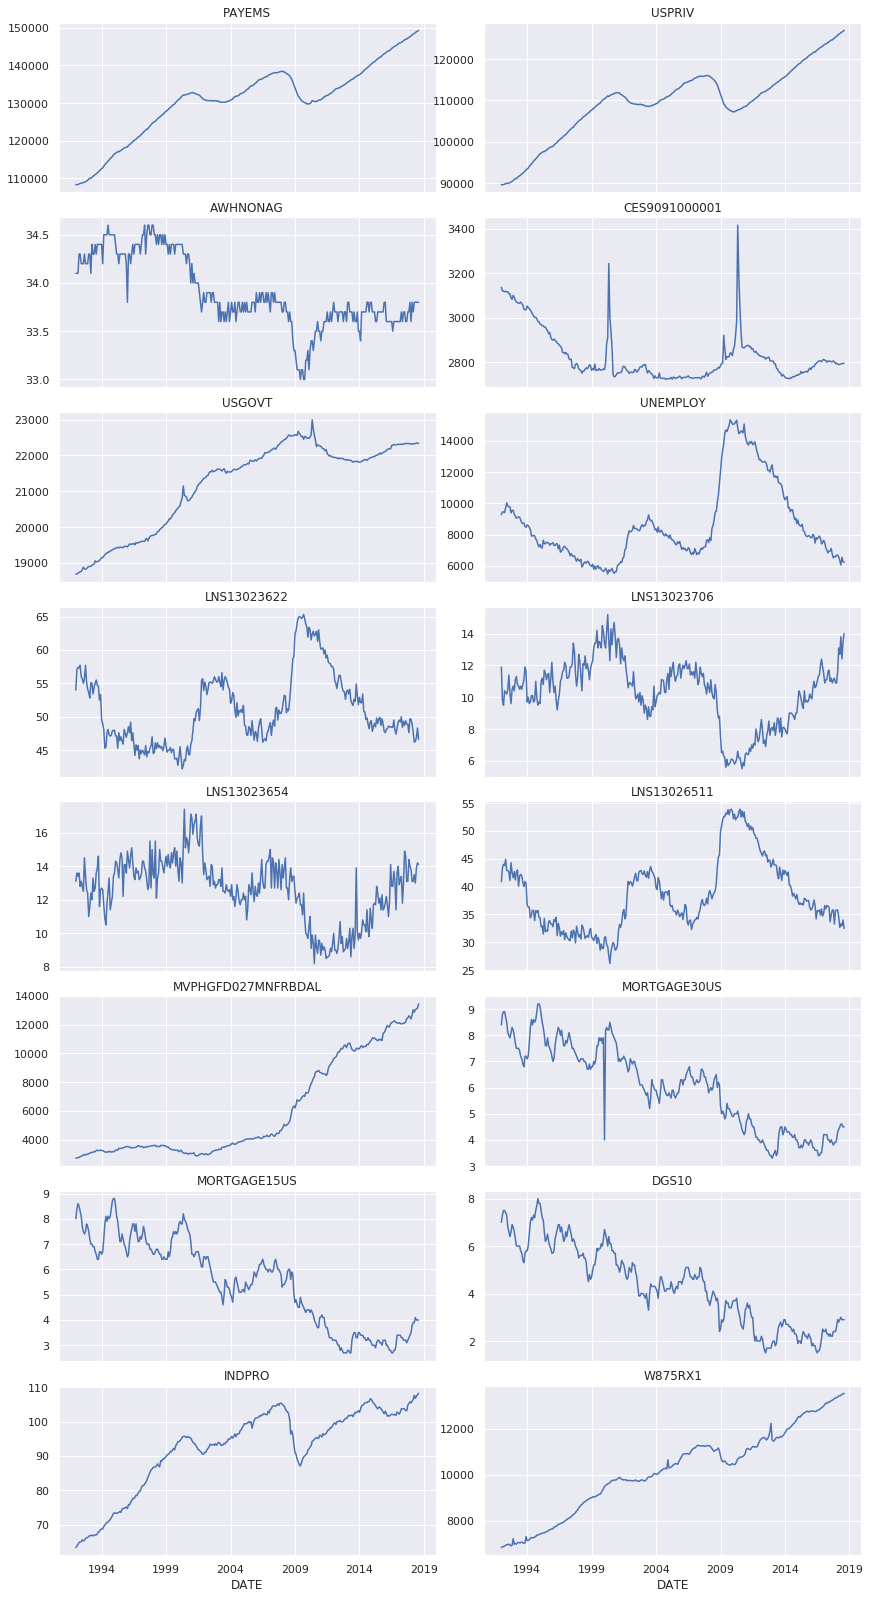

In [11]:
ncols = 2
fig, axs = plt.subplots(nrows=int(np.ceil(df.columns.size/ncols)),
                        ncols=ncols,
                        figsize=(12, 22),
                        sharex=True)
fig.tight_layout()
for idx, label in enumerate(df.columns):
    i = idx // ncols
    j = idx % ncols
    df[label].plot(title=label, ax=axs[i, j])

Drop possible redundant columns.

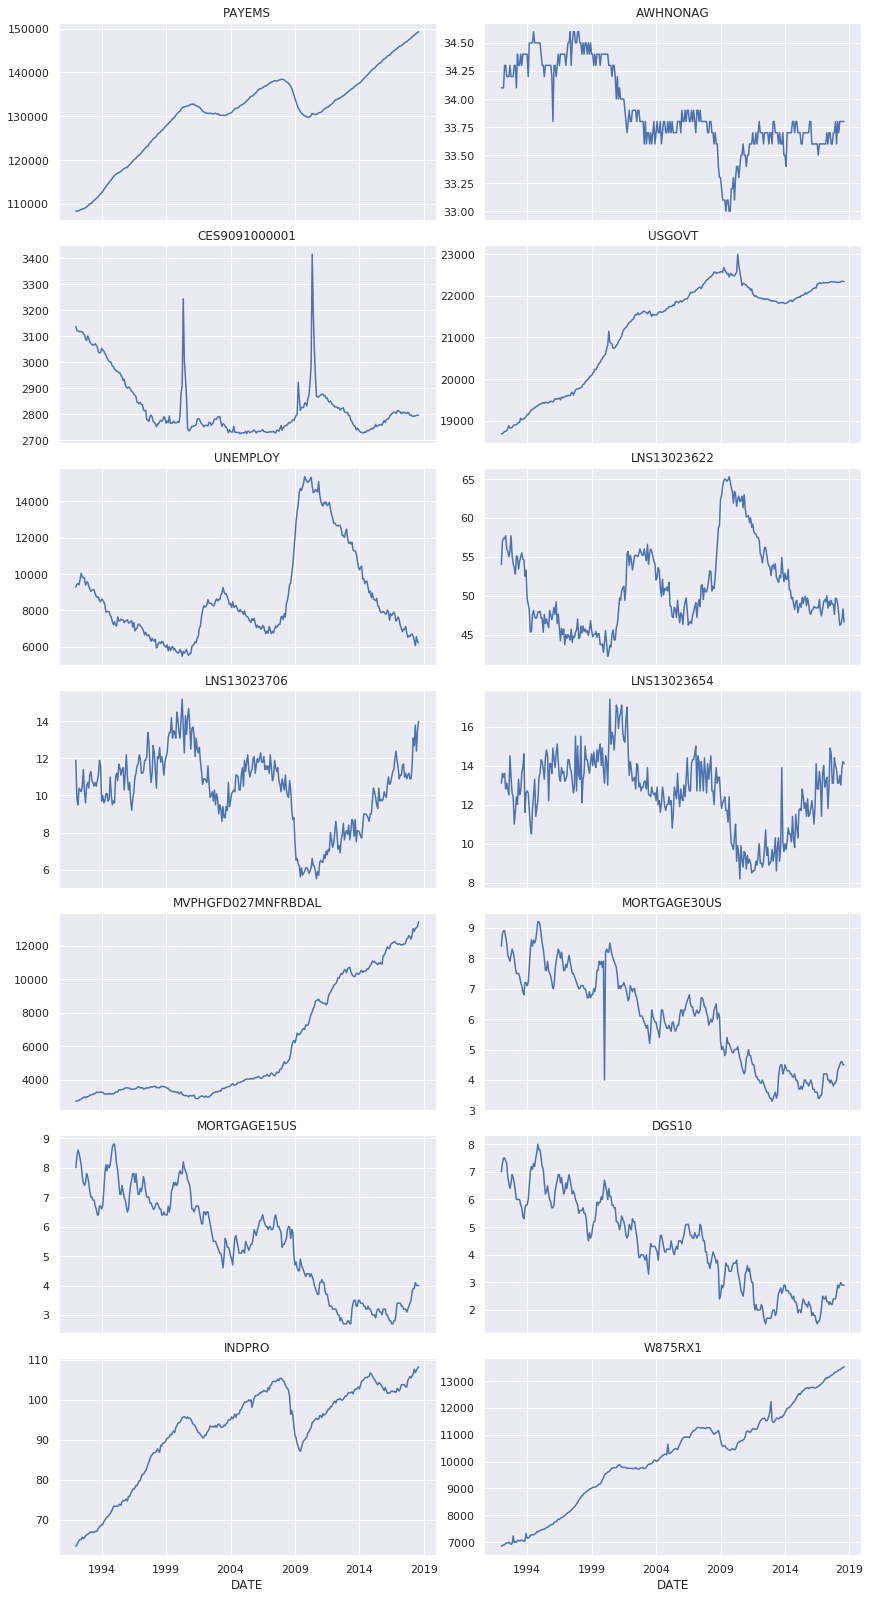

In [12]:
df.drop(labels=["USPRIV", "LNS13026511"], axis=1, inplace=True)
ncols = 2
fig, axs = plt.subplots(nrows=int(np.ceil(df.columns.size/ncols)),
                        ncols=ncols,
                        figsize=(12, 22),
                        sharex=True)
fig.tight_layout()
for idx, label in enumerate(df.columns):
    i = idx // ncols
    j = idx % ncols
    df[label].plot(title=label, ax=axs[i, j])

Check on autocorrelation plots to get an estimate of lag in the time series

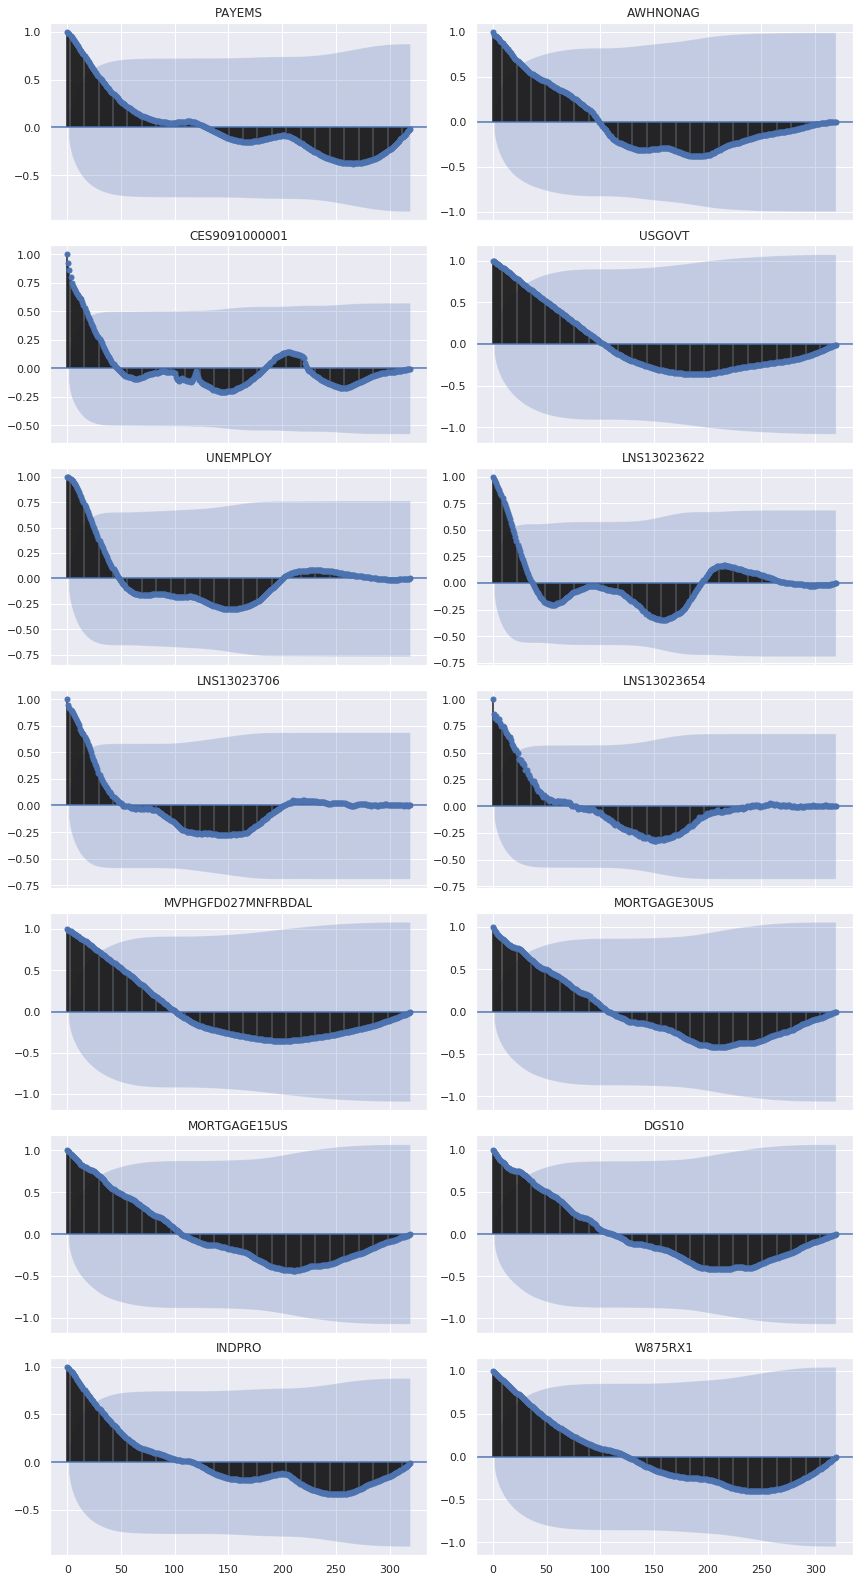

In [13]:
ncols = 2
fig, axs = plt.subplots(nrows=int(np.ceil(df.columns.size/ncols)),
                        ncols=ncols,
                        figsize=(12, 22),
                        sharex=True)
fig.tight_layout()
for idx, label in enumerate(df.columns):
    i = idx // ncols
    j = idx % ncols
    plot_acf(df[label], title=label, ax=axs[i, j])

Detrend time series (make time series stationary)

In [14]:
#
#
#
#
#

Save prcessed data

In [15]:
ffname = os.path.join(ROOT_DIR, "reb", "data", "ext", "data_monthly_processed.csv")
df.to_csv(ffname)

In [16]:
df.shape

(320, 14)